# Depression & Mental Health Analysis

This notebook runs EDA and the required inferential tests on `Mental Health Classification.csv`.

**Statistical Tests Performed:**

1. **One-Way ANOVA**: Testing for differences in mean `Depression_Score` across `Education_Level` groups
2. **One-Sample t-Test**: Testing whether mean `Sleep_Hours` differs from 7 hours
3. **Chi-Square Independence Test**: Testing association between `Gender` and `Suicide_Attempts`
4. **Simple Linear Regression**: Modeling `Depression_Score` as a function of `SocialMedia_Hours`
5. **Pearson Correlation**: Assessing linear relationship between `Sleep_Hours` and `SocialMedia_Hours`


## Variable Encodings

**Demographics**
- `Gender`: 0 = Male, 1 = Female
- `Age`: years
- `Education_Level`: 0 = Primary or below, 1 = Secondary/High school, 2 = Undergraduate, 3 = Postgraduate or higher
- `Employment_Status`: 0 = Unemployed, 1 = Student, 2 = Employed, 3 = Self-employed, 4 = Other

**Depression classification & symptoms**
- `Depression_Type` (code → subtype):

| Code | Subtype |
| --- | --- |
| 0 | No clinically significant |
| 1 | Minimal / Mild |
| 2 | Moderate |
| 3 | Moderately-severe |
| 4 | Severe |
| 5 | Persistent depressive disorder (dysthymia) |
| 6 | Seasonal affective pattern |
| 7 | Peripartum / Postpartum |
| 8 | Bipolar-related depressive episode |
| 9 | Situational / Reactive |
| 10 | Psychotic depression |
| 11 | Other specified depressive disorder |
- `Symptoms`: numeric code representing symptom clusters
- `Low_Energy`: 0 = No, 1 = Yes, 2 = Occasionally
- `Low_SelfEsteem`: 0 = No, 1 = Yes, 2 = Occasionally
- `Search_Depression_Online`: 0 = No, 1 = Yes
- `Worsening_Depression`: 0 = No, 1 = Yes

**Lifestyle / behavior**
- `Your overeating level`: 0 = None; 1–4 = Mild; 5–8 = Moderate; 9–12 = Severe
- `How many times you eat` (per day): 0 = ≤2 meals, 1 = 3 meals, 2 = 4–5 meals, 3 = >5 meals
- `SocialMedia_Hours`: hours/day (0–12)
- `SocialMedia_WhileEating`: 0 = Never, 1 = Rarely, 2 = Often, 3 = Always
- `Sleep_Hours`: hours/night (3–10)
- `Nervous_Level`: 1–10 anxiety/nervousness scale

**Outcome / coping / risk**
- `Depression_Score`: 0–30 depression severity score
- `Coping_Methods`: 0–13 coping strategies count/score
- `Self_Harm`: 0 = No history, 1 = History of self-harm
- `Mental_Health_Support`: 0 = No, 1 = Yes
- `Suicide_Attempts`: 0 = None, 1 = Once, 2 = Twice, 3 = Three or more


In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

sns.set(style="whitegrid", context="notebook")
pd.set_option("display.float_format", lambda x: f"{x:.3f}")
%matplotlib inline


In [107]:
data_path = "Mental Health Classification.csv"
df = pd.read_csv(data_path)

print("Shape:", df.shape)
display(df.head())


Shape: (1998, 21)


,Gender,Age,Education_Level,Employment_Status,Depression_Type,Symptoms,Low_Energy,Low_SelfEsteem,Search_Depression_Online,Worsening_Depression,...,How many times you eat,SocialMedia_Hours,SocialMedia_WhileEating,Sleep_Hours,Nervous_Level,Depression_Score,Coping_Methods,Self_Harm,Mental_Health_Support,Suicide_Attempts
0,1,25,2,3,5,11,1,1,1,1,...,0,10,3,10,10,10,11,0,0,0
1,1,25,2,2,5,0,1,1,0,1,...,0,8,3,4,10,10,0,0,1,0
2,1,25,2,3,2,5,1,1,1,1,...,0,10,3,4,10,10,0,1,1,1
3,0,25,2,2,6,7,0,1,0,1,...,0,4,3,3,10,10,5,1,1,1
4,1,25,2,2,6,5,0,0,0,0,...,1,3,3,7,1,3,0,0,0,0


In [122]:
# Missing values and basic stats
missing = df.isna().sum()
missing_count = missing.sum()
if missing_count > 0:
    display(missing[missing > 0])
else:
    print("No missing values")

numeric_cols = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]
display(df[numeric_cols].describe().T)


No missing values


,count,mean,std,min,25%,50%,75%,max
Gender,1998.000,0.514,0.500,0.000,0.000,1.000,1.000,1.000
Age,1998.000,24.262,7.929,10.000,25.000,25.000,25.000,35.000
Education_Level,1998.000,1.869,0.472,0.000,2.000,2.000,2.000,3.000
Employment_Status,1998.000,2.097,0.874,0.000,2.000,2.000,2.000,4.000
Depression_Type,1998.000,5.673,2.936,0.000,2.000,5.000,9.000,11.000
Symptoms,1998.000,6.553,3.852,0.000,5.000,5.000,9.000,14.000
Low_Energy,1998.000,0.710,0.486,0.000,0.000,1.000,1.000,2.000
Low_SelfEsteem,1998.000,0.696,0.489,0.000,0.000,1.000,1.000,2.000
Search_Depression_Online,1998.000,0.387,0.487,0.000,0.000,0.000,1.000,1.000
Worsening_Depression,1998.000,0.652,0.476,0.000,0.000,1.000,1.000,1.000


## Exploratory Data Analysis
Key visual summaries for the main variables used in the inferential tests.


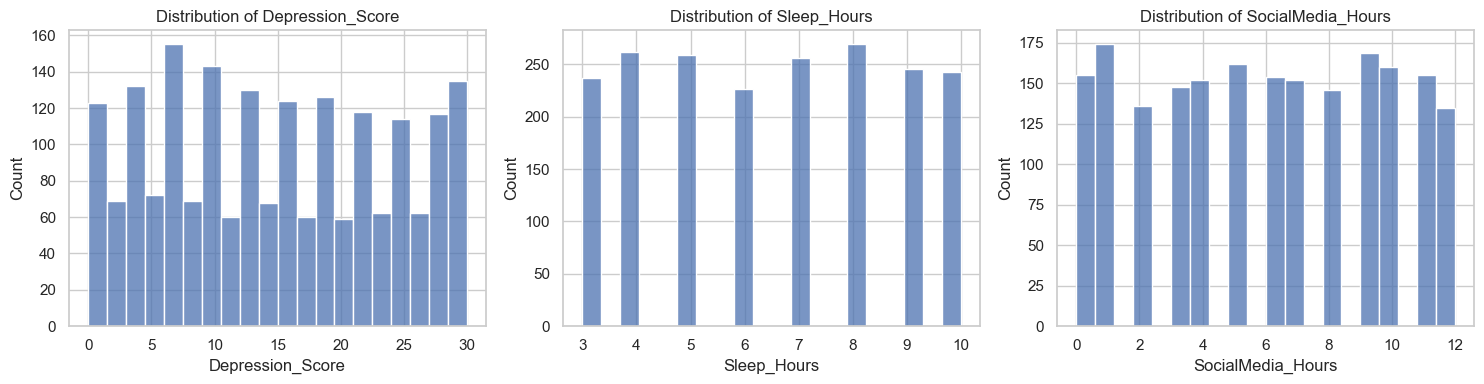

In [109]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, col in zip(axes, ["Depression_Score", "Sleep_Hours", "SocialMedia_Hours"]):
    sns.histplot(data=df, x=col,ax=ax, bins=20)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()


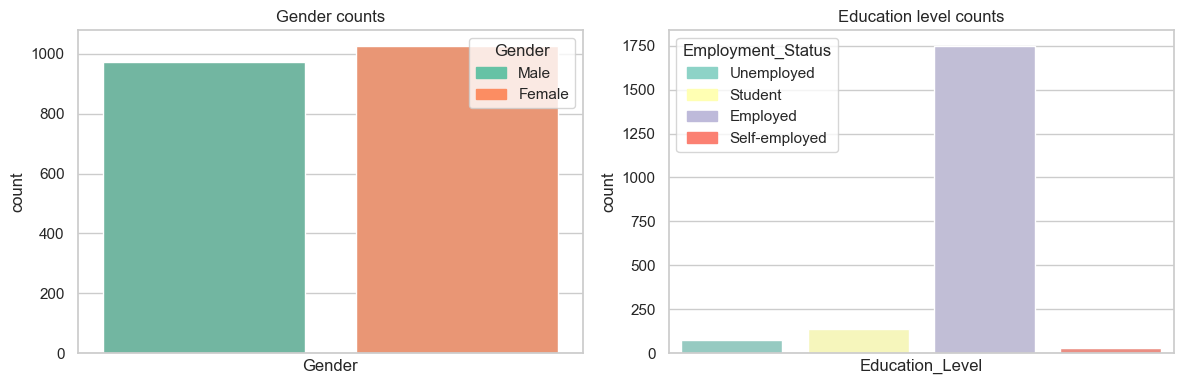

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gender counts with legend
gender_palette = sns.color_palette("Set2", n_colors=2)
sns.countplot(x="Gender", hue="Gender", data=df, ax=axes[0], palette=gender_palette, legend=False)
axes[0].set_xticks([])
gender_handles = [plt.matplotlib.patches.Patch(color=gender_palette[i]) for i in range(2)]
axes[0].legend(gender_handles, ["Male", "Female"], title="Gender", loc="lower right", fontsize=9)
axes[0].set_title("Gender counts")

# Education level counts with legend
edu_levels = sorted(df["Education_Level"].dropna().unique())
edu_palette = sns.color_palette("Set3", n_colors=len(edu_levels))
sns.countplot(x="Education_Level", hue="Education_Level", data=df, ax=axes[1], palette=edu_palette, legend=False)
axes[1].set_xticks([])
edu_handles = [plt.matplotlib.patches.Patch(color=edu_palette[i]) for i in range(len(edu_levels))]
edu_label_map = {
    0: "Unemployed",
    1: "Student",
    2: "Employed",
    3: "Self-employed",
    4: "Other",
}
edu_labels = [edu_label_map.get(int(x), str(x)) for x in edu_levels]
axes[1].legend(edu_handles, edu_labels, title="Employment_Status", loc="lower right", fontsize=9)
axes[1].set_title("Education level counts")

plt.tight_layout()


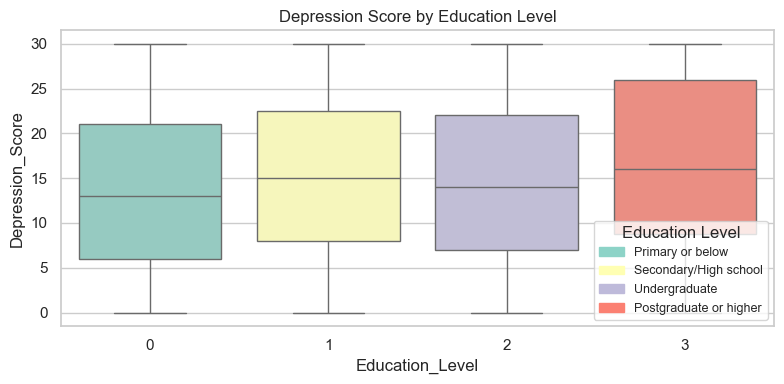

In [125]:
plt.figure(figsize=(8, 4))
edu_palette = sns.color_palette("Set3", n_colors=4)
sns.boxplot(x="Education_Level", hue="Education_Level", y="Depression_Score", data=df, palette=edu_palette, legend=False)

edu_level_map = {
    0: "Primary or below",
    1: "Secondary/High school",
    2: "Undergraduate",
    3: "Postgraduate or higher",
}
edu_levels = sorted(df["Education_Level"].dropna().unique())
edu_handles = [plt.matplotlib.patches.Patch(color=edu_palette[i]) for i in range(len(edu_levels))]
edu_labels = [edu_level_map.get(int(x), str(x)) for x in edu_levels]
plt.legend(edu_handles, edu_labels, title="Education Level", loc="lower right", fontsize=9)

plt.title("Depression Score by Education Level")
plt.tight_layout()


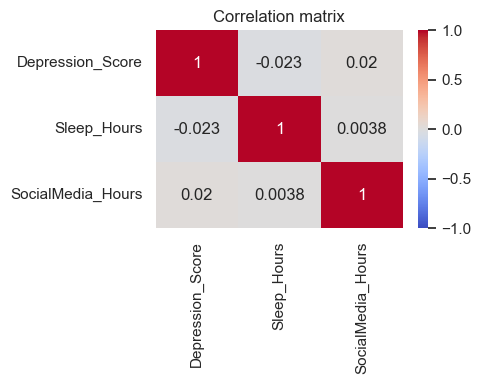

In [113]:
corr_cols = ["Depression_Score", "Sleep_Hours", "SocialMedia_Hours"]
corr = df[corr_cols].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.tight_layout()


### One-Way ANOVA: Education_Level → Depression_Score
- H0: Mean depression score is the same for all education levels.
- H1: At least one education level has a different mean depression score.
- α = 0.05


In [114]:
anova_df = df[["Education_Level", "Depression_Score"]].dropna()
model = sm.formula.ols("Depression_Score ~ C(Education_Level)", data=anova_df).fit()
raw_anova = sm.stats.anova_lm(model, typ=2)

alpha = 0.05
p_val = raw_anova.loc["C(Education_Level)", "PR(>F)"]

df_between = raw_anova.loc["C(Education_Level)", "df"]
df_within = raw_anova.loc["Residual", "df"]
f_crit = stats.f.ppf(1 - alpha, df_between, df_within)

# Summary by group similar to Excel layout
summary_df = (
    anova_df.groupby("Education_Level")["Depression_Score"]
    .agg(
        Count="count",
        Sum_of_Depression_Score="sum",
        Average_Depression_Score="mean",
        Variance_of_Depression_Score="var",
    )
    .reset_index()
)

# Format ANOVA table similar to Excel layout
anova_display = pd.DataFrame(
    {
        "Source": ["Between Groups", "Within Groups", "Total"],
        "SS": [raw_anova.loc["C(Education_Level)", "sum_sq"], raw_anova.loc["Residual", "sum_sq"], raw_anova["sum_sq"].sum()],
        "df": [df_between, df_within, raw_anova["df"].sum()],
    }
)
anova_display["MS"] = anova_display["SS"] / anova_display["df"]
anova_display.loc[anova_display["Source"] == "Between Groups", "F"] = raw_anova.loc["C(Education_Level)", "F"]
anova_display.loc[anova_display["Source"] == "Between Groups", "P-value"] = p_val
anova_display.loc[anova_display["Source"] == "Between Groups", "F_crit"] = f_crit

conclusion = "Reject H0 (means differ across education levels)" if p_val < alpha else "Fail to reject H0 (no evidence of mean difference)"

display(summary_df)
display(anova_display)
print(f"Conclusion at alpha={alpha}: {conclusion}")


,Education_Level,Count,Sum_of_Depression_Score,Average_Depression_Score,Variance_of_Depression_Score
0,0,77,1036,13.455,78.909
1,1,139,2083,14.986,76.319
2,2,1750,25572,14.613,80.196
3,3,32,525,16.406,93.152


,Source,SS,df,MS,F,P-value,F_crit
0,Between Groups,225.353,3.000,75.118,0.938,0.421,2.609
1,Within Groups,159680.104,1994.000,80.080,NaN,NaN,NaN
2,Total,159905.457,1997.000,80.073,NaN,NaN,NaN


Conclusion at alpha=0.05: Fail to reject H0 (no evidence of mean difference)


### One-Sample t-Test: Sleep_Hours vs 7 hours
- H0: Mean sleep hours = 7.
- H1: Mean sleep hours ≠ 7.
- α = 0.05


In [138]:
sleep = df["Sleep_Hours"].dropna()
ttest_res = stats.ttest_1samp(sleep, popmean=7)
ci_low, ci_high = stats.t.interval(0.95, len(sleep)-1, loc=sleep.mean(), scale=stats.sem(sleep))

alpha = 0.05
conclusion = "Reject H0 (mean sleep differs from 7 hours)" if ttest_res.pvalue < alpha else "Fail to reject H0 (no evidence mean differs from 7 hours)"

summary_df = pd.DataFrame([
    {
        "statistic": ttest_res.statistic,
        "pvalue": f"{ttest_res.pvalue:.2e}",
        "df": len(sleep) - 1,
        "mean": sleep.mean(),
        "ci_low": ci_low,
        "ci_high": ci_high,
        "alpha": alpha,
        "conclusion": conclusion,
    }
])

display(summary_df)

,statistic,pvalue,df,mean,ci_low,ci_high,alpha,conclusion
0,-9.703,8.80e-22,1997,6.506,6.406,6.605,0.050,Reject H0 (mean sleep differs from 7 hours)


### Chi-Square Independence: Gender × Suicide_Attempts
- H0: Gender and Suicide_Attempts are independent.
- H1: Gender and Suicide_Attempts are associated.
- α = 0.05


In [ ]:
chi_df = df[["Gender", "Suicide_Attempts"]].dropna()
contingency = pd.crosstab(chi_df["Gender"], chi_df["Suicide_Attempts"])
contingency.index = contingency.index.map({0: "Male", 1: "Female"})
chi_res = stats.chi2_contingency(contingency)
chi2, p_val, dof, expected = chi_res

alpha = 0.05
conclusion = "Reject H0 (association between Gender and Suicide_Attempts)" if p_val < alpha else "Fail to reject H0 (no evidence of association)"

summary_df = pd.DataFrame([
    {
        "chi2": chi2,
        "pvalue": p_val,
        "dof": dof,
        "alpha": alpha,
        "conclusion": conclusion,
    }
])

print("Contingency table:")
display(contingency)
print("Expected frequencies:")
expected_df = pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)
display(expected_df)
display(summary_df)


Contingency table:


Suicide_Attempts,0,1,2,3
Gender,,,,
Male,278,255,215,223
Female,281,240,246,260


Expected frequencies:


Suicide_Attempts,0,1,2,3
Gender,,,,
Male,271.666,240.563,224.040,234.731
Female,287.334,254.437,236.960,248.269


,chi2,pvalue,dof,alpha,conclusion
0,3.823,0.281,3,0.050,Fail to reject H0 (no evidence of association)


### Simple Linear Regression: SocialMedia_Hours → Depression_Score
- H0: The slope for SocialMedia_Hours is 0 (no linear relationship).
- H1: The slope for SocialMedia_Hours ≠ 0.
- α = 0.05


                            OLS Regression Results                            
Dep. Variable:       Depression_Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7929
Date:                Fri, 19 Dec 2025   Prob (F-statistic):              0.373
Time:                        19:17:08   Log-Likelihood:                -7212.7
No. Observations:                1998   AIC:                         1.443e+04
Df Residuals:                    1996   BIC:                         1.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                14.3375      0.37

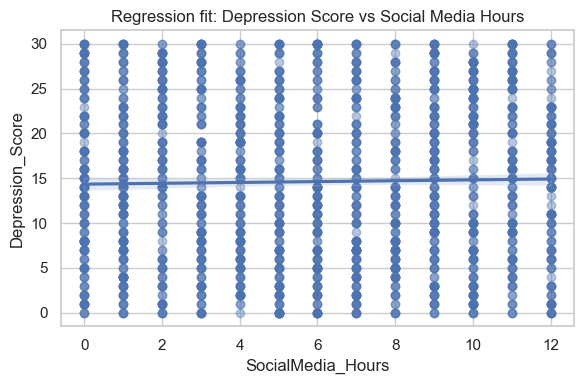

In [117]:
reg_df = df[["SocialMedia_Hours", "Depression_Score"]].dropna()
X = sm.add_constant(reg_df["SocialMedia_Hours"])
model = sm.OLS(reg_df["Depression_Score"], X).fit()

alpha = 0.05
p_slope = model.pvalues.get("SocialMedia_Hours", np.nan)
conclusion = "Reject H0 (slope differs from 0)" if p_slope < alpha else "Fail to reject H0 (no evidence slope differs from 0)"

print(model.summary())
print(f"Conclusion at alpha={alpha}: {conclusion}")

plt.figure(figsize=(6, 4))
sns.regplot(x="SocialMedia_Hours", y="Depression_Score", data=reg_df, scatter_kws={"alpha":0.4})
plt.title("Regression fit: Depression Score vs Social Media Hours")
plt.tight_layout()


### Pearson Correlation: Sleep_Hours and SocialMedia_Hours
- H0: ρ = 0 (no linear correlation).
- H1: ρ ≠ 0.
- α = 0.05


In [118]:
corr_df = df[["Sleep_Hours", "SocialMedia_Hours"]].dropna()
corr_res = stats.pearsonr(corr_df["Sleep_Hours"], corr_df["SocialMedia_Hours"])

alpha = 0.05
conclusion = "Reject H0 (linear correlation exists)" if corr_res.pvalue < alpha else "Fail to reject H0 (no evidence of linear correlation)"

summary_df = pd.DataFrame([
    {
        "r": corr_res.statistic,
        "pvalue": corr_res.pvalue,
        "n": len(corr_df),
        "alpha": alpha,
        "conclusion": conclusion,
    }
])

display(summary_df)


,r,pvalue,n,alpha,conclusion
0,0.004,0.865,1998,0.050,Fail to reject H0 (no evidence of linear corre...
